<a href="https://colab.research.google.com/github/AmJustCJ/FinalYearProjectWork/blob/main/FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 54.0 MB/s eta 0:00:00


In [ ]:
!pip install matplotlib

In [ ]:
!pip install scikit-learn

In [ ]:
import tensorflow as tf
import rasterio as rio
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, UpSampling2D, concatenate, Input
from matplotlib import pyplot as plt
from keras.metrics import Precision, Recall, BinaryAccuracy
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras import backend as K

In [ ]:
def normalizing(data):
    min_val = np.min(data)
    max_val = np.max(data)
    data_normalized = (data - min_val) / (max_val - min_val)
    return data_normalized

In [ ]:
def get_patch(array, size=256):
    patch_list = []
    height, width, _ = array.shape
    for i in range(0, height, size):
        for j in range(0, width, size):
            patch = array[i:i+size, j:j+size, :]
            if patch.shape[0] == size and patch.shape[1] == size:
                patch_list.append(patch)
    return patch_list

In [ ]:
def get_patch2(array, size=256):
    patch_list = []
    height, width = array.shape
    for i in range(0, height, size):
        for j in range(0, width, size):
            patch = array[i:i+size, j:j+size] #The diff with above func is that this make it 2D array
            if patch.shape[0] == size and patch.shape[1] == size:
                patch_list.append(patch)
    return patch_list

In [ ]:
elec_demand = rio.open('/content/drive/MyDrive/FYP_data/2SquareElec.tif')
elec_demand_data = elec_demand.read(1)
print("Elec:", np.unique(elec_demand_data))
elec_demand_norm = normalizing(elec_demand_data)
print("Elec norm:", np.unique(elec_demand_norm))


Elec: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
Elec norm: [0.         0.11111111 0.22222222 0.33333334 0.44444445 0.5555556
 0.6666667  0.7777778  0.8888889  1.        ]


In [ ]:
Interest_spot = rio.open('/content/drive/MyDrive/FYP_data/2SquareInterest.tif')
Interest_spot_data = Interest_spot.read(1)
print("Interest:", np.unique(Interest_spot_data))
Interest_spot_norm = normalizing(Interest_spot_data)
print("Interest norm:", np.unique(Interest_spot_norm))


Interest: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Interest norm: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [ ]:
Land_price = rio.open('/content/drive/MyDrive/FYP_data/2SquareLandPrice.tif')
Land_price_data = Land_price.read(1)
print("land price:", np.unique(Land_price_data))
Land_price_norm = normalizing(Land_price_data)
print("Land price norm:", np.unique(Land_price_norm))

land price: [    0.      2733.8916  2756.6924 ... 70750.164  78718.46   79598.59  ]
Land price norm: [0.         0.03434598 0.03463243 ... 0.88883686 0.98894286 1.        ]


In [ ]:
Natural_environment = rio.open('/content/drive/MyDrive/FYP_data/2SquareNat.tif')
Natural_environment_data = Natural_environment.read(1)
print("nat:", np.unique(Natural_environment_data))
Natural_environment_norm = normalizing(Natural_environment_data)
print("Nat norm:", np.unique(Natural_environment_norm))


nat: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Nat norm: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [ ]:
Roads = rio.open('/content/drive/MyDrive/FYP_data/2SquareRoad.tif')
Roads_data = Roads.read(1)
print("road:", np.unique(Roads_data))
Roads_norm = normalizing(Roads_data)
print("road norm:", np.unique(Roads_norm))

road: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
road norm: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [ ]:
Elevation = rio.open('/content/drive/MyDrive/FYP_data/2SquareSlopeElevation.tif')
Elevation_data = Elevation.read(1)
print("eleva:", np.unique(Elevation_data))
Elevation_norm = normalizing(Elevation_data)
print("elev norm:", np.unique(Elevation_norm))

eleva: [   0.   19.   20. ... 1963. 1965. 1967.]
elev norm: [0.         0.00965938 0.01016777 ... 0.99796645 0.99898322 1.        ]


In [ ]:
Transmission_line = rio.open('/content/drive/MyDrive/FYP_data/2SquareTrans.tif')
Transmission_line_data = Transmission_line.read(1)
print("transmi:",np.unique(Transmission_line_data))
Transmission_line_norm = normalizing(Transmission_line_data)
print("trans norm:", np.unique(Transmission_line_norm))

transmi: [ 0.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
trans norm: [0.  0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [ ]:
Urban_area = rio.open('/content/drive/MyDrive/FYP_data/2SquareUrban.tif')
Urban_area_data = Urban_area.read(1)
print("urban:", np.unique(Urban_area_data))
Urban_area_norm = normalizing(Urban_area_data)
print("urban norm:", np.unique(Urban_area_norm))

urban: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
urban norm: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [ ]:
Wind_speed = rio.open('/content/drive/MyDrive/FYP_data/2SquareWindAtlas.tif')
Wind_speed_data = Wind_speed.read(1)
print("wind:", np.unique(Wind_speed_data))
Wind_speed_norm = normalizing(Wind_speed_data)
print("wind norm:", np.unique(Wind_speed_norm))

wind: [ 1.3139184  1.6835304  1.7052925 ... 14.390219  14.512985  14.68818  ]
wind norm: [0.         0.02763608 0.02926323 ... 0.9777213  0.9869006  1.        ]


In [ ]:
#Prepare to stack all 9 criteria map together as 1 input
input_data = np.stack((elec_demand_norm, Interest_spot_norm, Land_price_norm,
                        Natural_environment_norm, Roads_norm, Elevation_norm,
                        Transmission_line_norm, Urban_area_norm, Wind_speed_norm), axis=-1)

print("Shape of input data:", input_data.shape)

Shape of input data: (4096, 4096, 9)


result: [0. 1.]
Shape of result data: (4096, 4096)


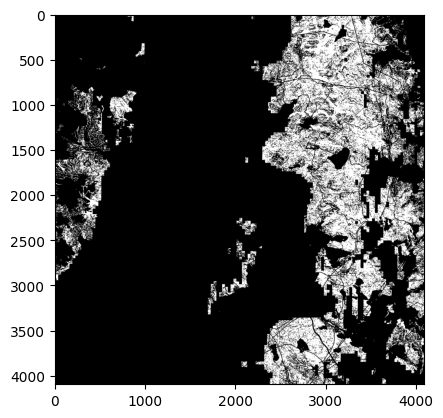

In [ ]:
#Prepare output data, the result
result_im = rio.open('/content/drive/MyDrive/FYP_data/2SquareResult.tif')
result_data = result_im.read(1)
print("result:", np.unique(result_data))
print("Shape of result data:", result_data.shape)

plt.imshow(result_data, cmap='gray')


In [ ]:
#Split input data(4096x4096x9 into a 256x256x9 array, and store in input_patches, should have 256 array in the list)
input_patches = get_patch(input_data)
#same goes for result
result_patches = get_patch2(result_data)

In [ ]:
#Turn the lists into a numpy array
input_patches_array = np.array(input_patches)
result_patches_array = np.array(result_patches)

In [ ]:
#Now split them to training sets
#training+validation get 80%, whereas testing get 20%
x_train_val, x_test, y_train_val, y_test = train_test_split(input_patches_array, result_patches_array, test_size=0.2, random_state=42)
#Now traning and validation got 80%, we split them into 25%, meaning:
#training 60%, vali 20%, test 20%
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, random_state=42)

In [ ]:
# Create performance metrics for model

precision = Precision()
recall = Recall()

def IntersectionOverUnion(y_true, y_pred, smooth=1e-6):
  Intersection = K.sum(y_true * y_pred)
  union = K.sum(y_true) + K.sum(y_pred) - Intersection
  iou = (Intersection + smooth) / (union + smooth)
  return iou

def DiceCoefficient(y_true, y_pred, smooth=1e-6):
  intersection = K.sum(y_true * y_pred)
  return (2 * intersection + smooth) / (K.sum(y_true) + K.sum(y_pred) + smooth)



In [ ]:
def create_Unet_cnn(input_shape=(256, 256, 9)):
    #Input layer
    inputs = Input(input_shape)

    #Downsampling
    c1 = Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
    p1 = MaxPooling2D((2,2))(c1)
    c2 = Conv2D(64, (3,3), activation='relu', padding='same')(p1)
    p2 = MaxPooling2D((2,2))(c2)
    c3 = Conv2D(128, (3,3), activation='relu', padding='same')(p2)
    p3 = MaxPooling2D((2,2))(c3)

    #Bottleneck
    bn = Conv2D(256, (3,3), activation='relu', padding='same')(p3)

    #Upsampling
    u1 = UpSampling2D((2,2))(bn)
    m1 = concatenate([u1, c3], axis=-1) #merge
    c4 = Conv2D(128, (3,3), activation='relu', padding='same')(m1)

    u2 = UpSampling2D((2,2))(c4)
    m2 = concatenate([u2, c2], axis=-1) #merge
    c5 = Conv2D(64, (3,3), activation='relu', padding='same')(m2)

    u3 = UpSampling2D((2,2))(c5)
    m3 = concatenate([u3, c1], axis=-1) #merge
    c6 = Conv2D(32, (3,3), activation='relu', padding='same')(m3)

    #Output
    outputs = Conv2D(1, (1,1), activation='sigmoid', padding='same')(c6)

    #Compile model
    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', precision, recall, IntersectionOverUnion, DiceCoefficient])

    return model

# Create and compile the model
model = create_Unet_cnn()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 9)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 32)         2624      ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)         0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 128, 128, 64)         18496     ['max_pooling2d[0][0]']   

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr = 0.0001)
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
hist = model.fit(x_train, y_train, batch_size=32, epochs=40, validation_data=(x_val, y_val),  callbacks=[reduce_lr, early_stop])

Epoch 1/40
5/5 [==============================] - 48s 6s/step - loss: 0.6372 - accuracy: 0.6916 - precision: 0.2233 - recall: 0.2450 - IntersectionOverUnion: 0.1234 - DiceCoefficient: 0.2154 - val_loss: 0.5193 - val_accuracy: 0.7519 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_IntersectionOverUnion: 0.1790 - val_DiceCoefficient: 0.3037 - lr: 0.0010
Epoch 2/40
5/5 [==============================] - 2s 433ms/step - loss: 0.4503 - accuracy: 0.8081 - precision: 0.0000e+00 - recall: 0.0000e+00 - IntersectionOverUnion: 0.1401 - DiceCoefficient: 0.2450 - val_loss: 0.4681 - val_accuracy: 0.7519 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_IntersectionOverUnion: 0.1934 - val_DiceCoefficient: 0.3240 - lr: 0.0010
Epoch 3/40
5/5 [==============================] - 2s 419ms/step - loss: 0.4146 - accuracy: 0.8081 - precision: 0.0000e+00 - recall: 0.0000e+00 - IntersectionOverUnion: 0.1882 - DiceCoefficient: 0.3161 - val_loss: 0.4532 - val_accuracy: 0.7519 - val_precision: 

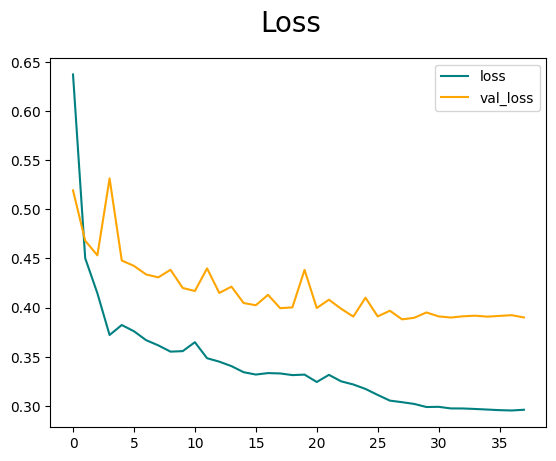

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label = 'loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper right')
plt.show()

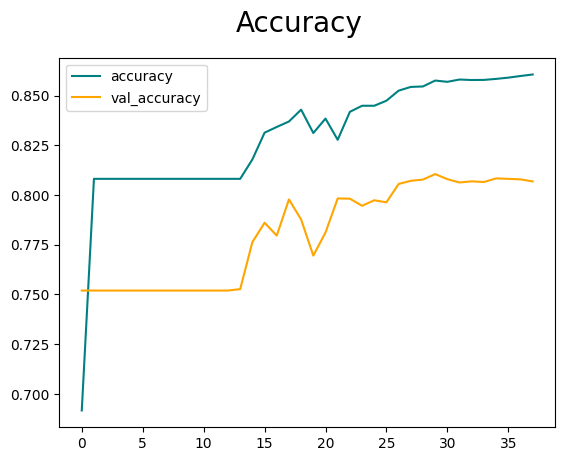

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

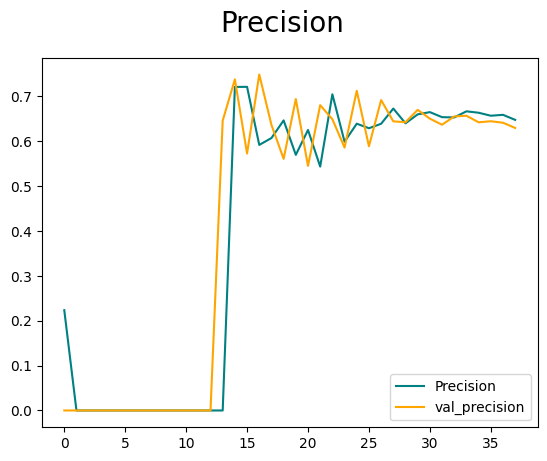

In [ ]:
fig = plt.figure()
plt.plot(hist.history['precision'], color='teal', label = 'Precision')
plt.plot(hist.history['val_precision'], color='orange', label='val_precision')
fig.suptitle('Precision', fontsize=20)
plt.legend(loc='lower right')
plt.show()

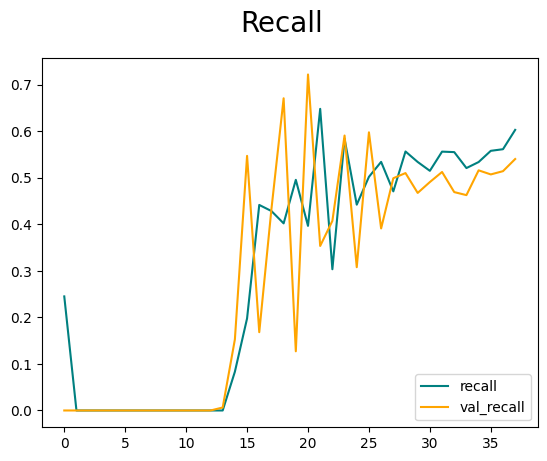

In [ ]:
fig = plt.figure()
plt.plot(hist.history['recall'], color='teal', label = 'recall')
plt.plot(hist.history['val_recall'], color='orange', label='val_recall')
fig.suptitle('Recall', fontsize=20)
plt.legend(loc='lower right')
plt.show()

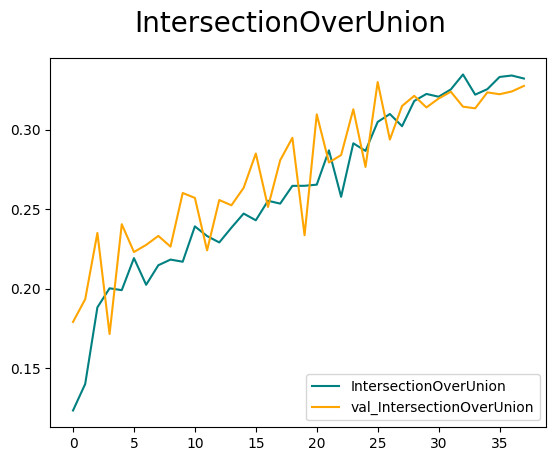

In [ ]:
fig = plt.figure()
plt.plot(hist.history['IntersectionOverUnion'], color='teal', label = 'IntersectionOverUnion')
plt.plot(hist.history['val_IntersectionOverUnion'], color='orange', label='val_IntersectionOverUnion')
fig.suptitle('IntersectionOverUnion', fontsize=20)
plt.legend(loc='lower right')
plt.show()

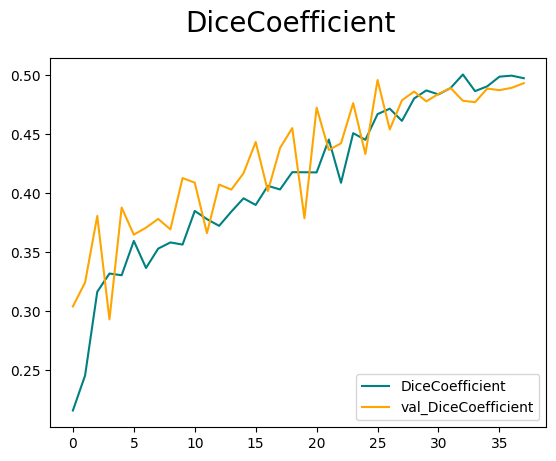

In [ ]:
fig = plt.figure()
plt.plot(hist.history['DiceCoefficient'], color='teal', label = 'DiceCoefficient')
plt.plot(hist.history['val_DiceCoefficient'], color='orange', label='val_DiceCoefficient')
fig.suptitle('DiceCoefficient', fontsize=20)
plt.legend(loc='lower right')
plt.show()

In [ ]:
test_loss, test_accuracy, test_precision, test_recall, test_iou, test_dice = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test Intersection Over Union: {test_iou}")
print(f"Test Dice Coefficient: {test_dice}")

2/2 [==============================] - 4s 4s/step - loss: 0.2876 - accuracy: 0.8736 - precision: 0.5518 - recall: 0.3164 - IntersectionOverUnion: 0.2345 - DiceCoefficient: 0.3796
Test Loss: 0.2876224219799042
Test Accuracy: 0.873554527759552
Test Precision: 0.5517695546150208
Test Recall: 0.31636783480644226
Test Intersection Over Union: 0.23448030650615692
Test Dice Coefficient: 0.3795779347419739


In [ ]:
predictions = model.predict(x_test)
threshold_pred = (predictions > 0.5).astype('float32')


2/2 [==============================] - 0s 104ms/step


In [ ]:
print(predictions.shape)

(52, 256, 256, 1)


In [ ]:
def plot_pred(y_test, predictions, num):
  for i in range(num):
    plt.figure(figsize=(15,5))

    plt.subplot(1,2,1)
    plt.imshow(y_test[i, :, :], cmap='gray')
    plt.title('Ground Truth')
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(predictions[i, :, :, 0], cmap='gray')
    plt.title('Model Prediction')
    plt.axis('off')

    plt.show()

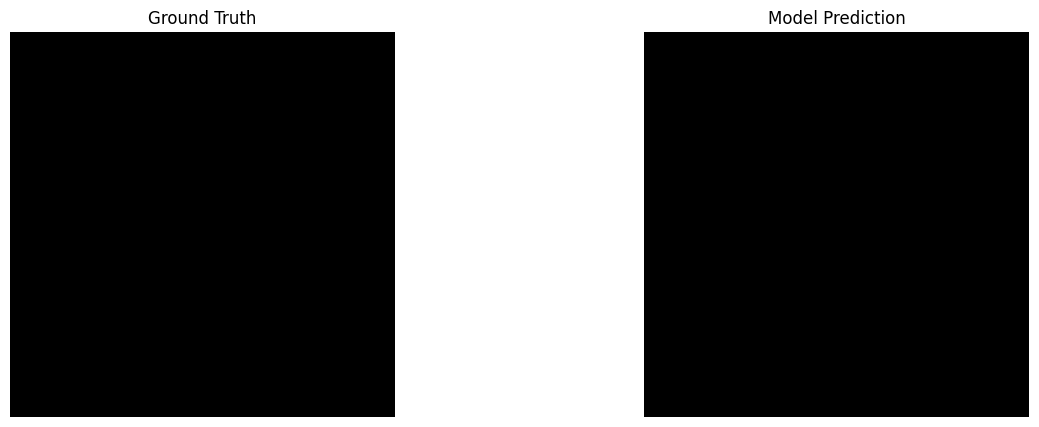

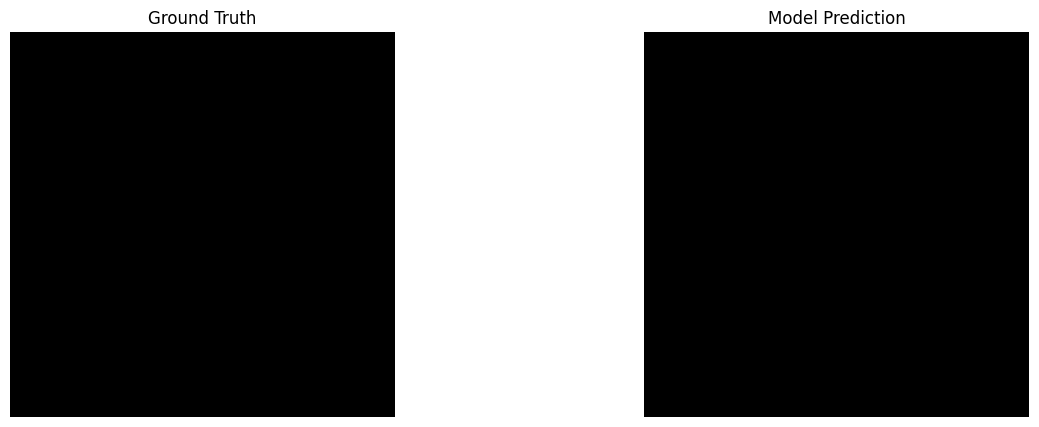

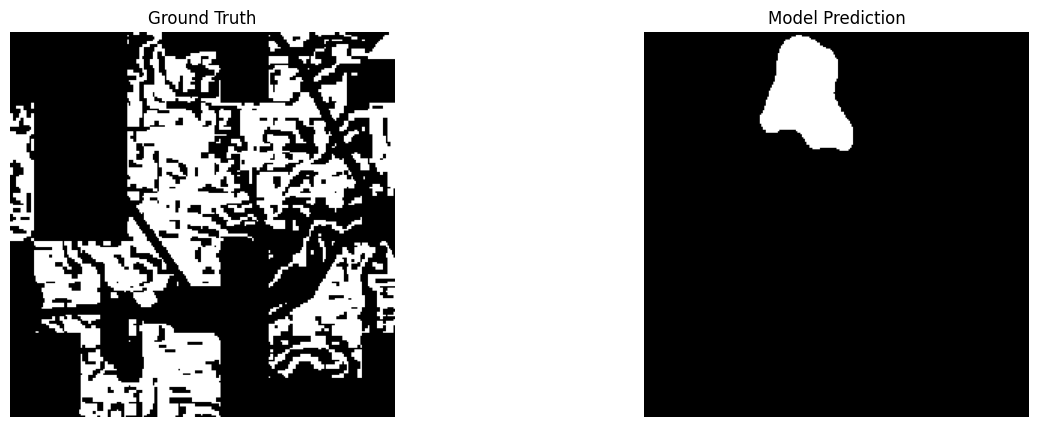

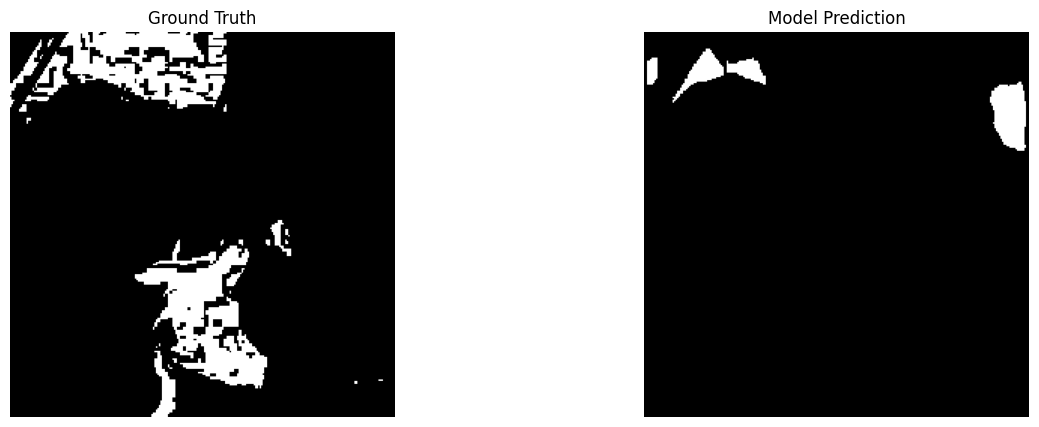

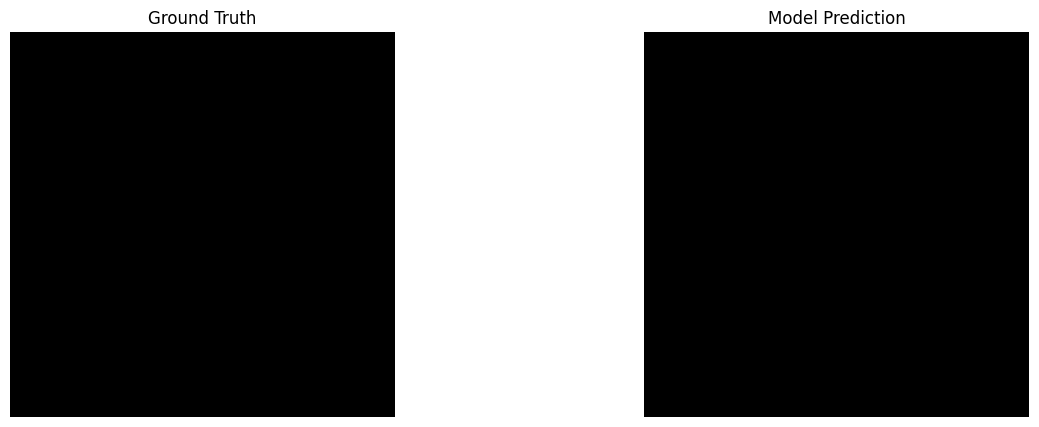

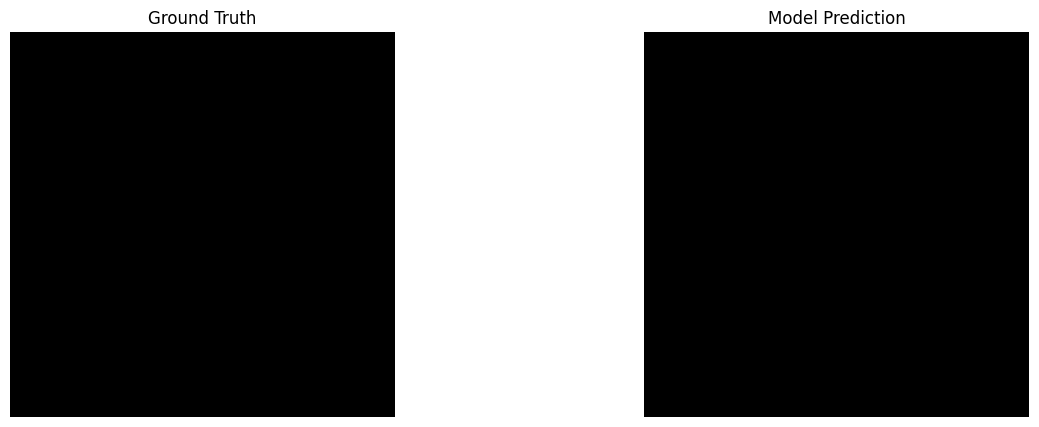

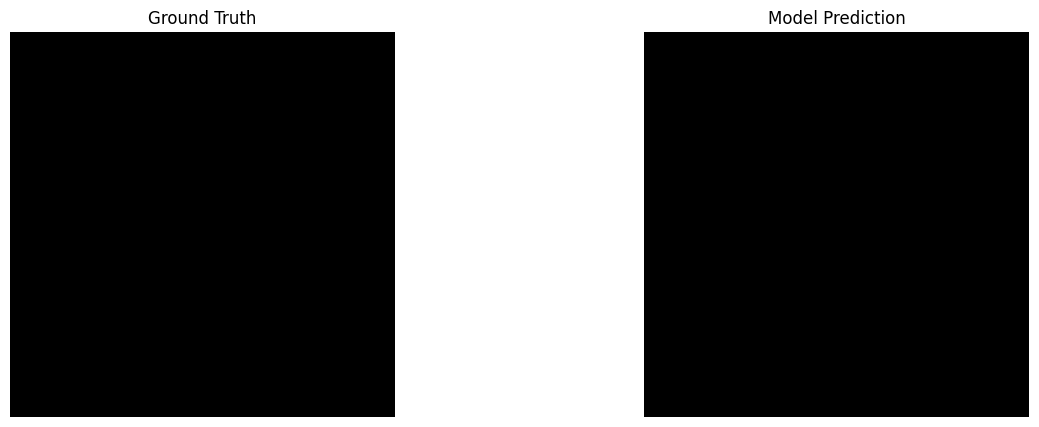

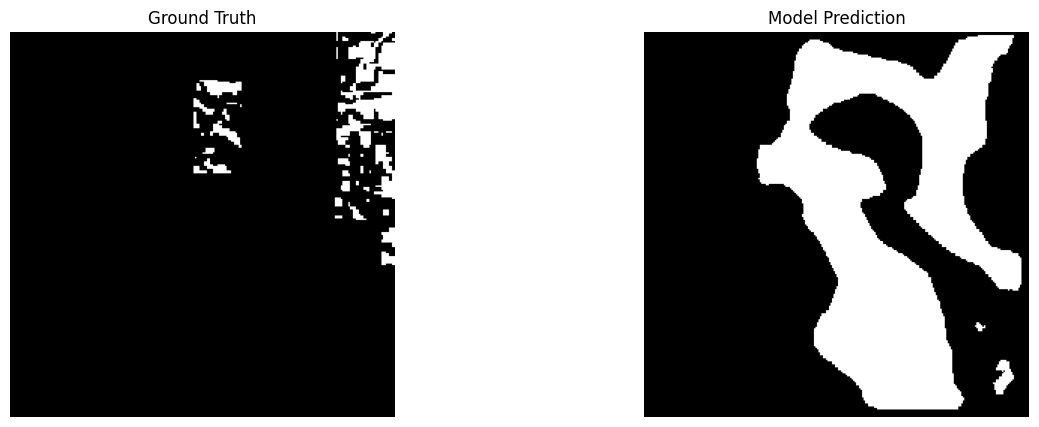

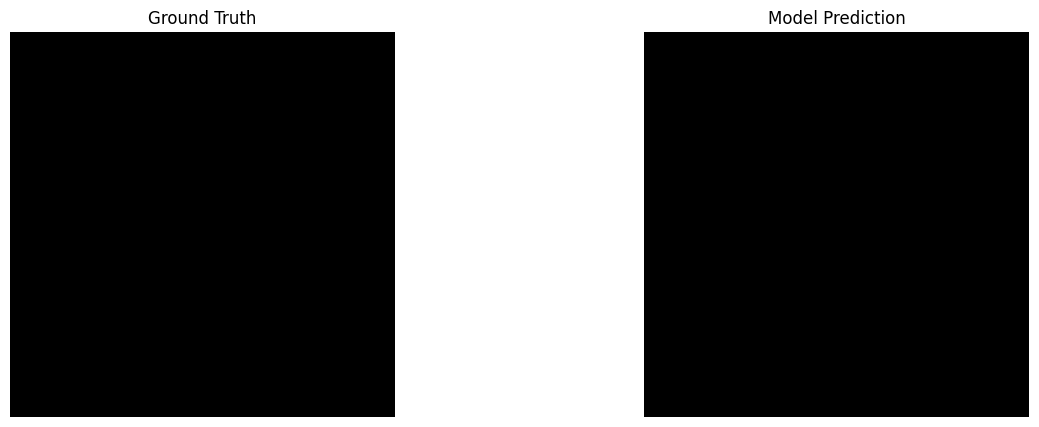

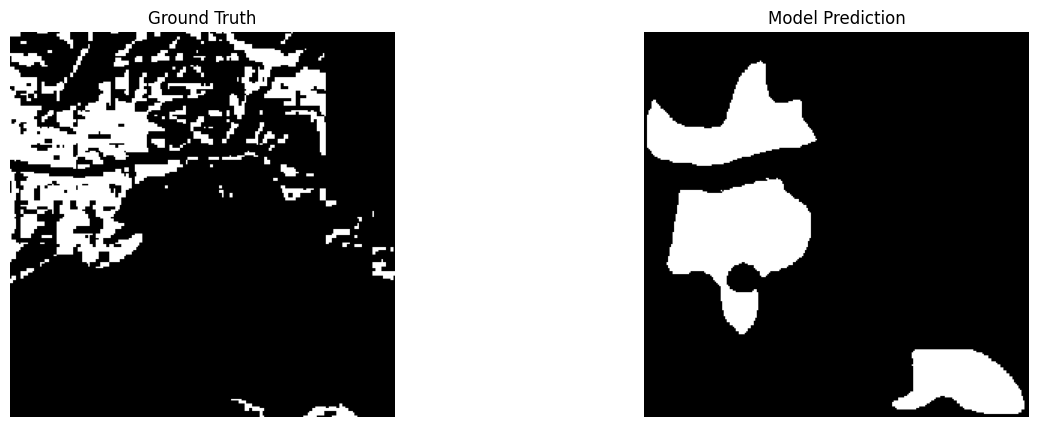

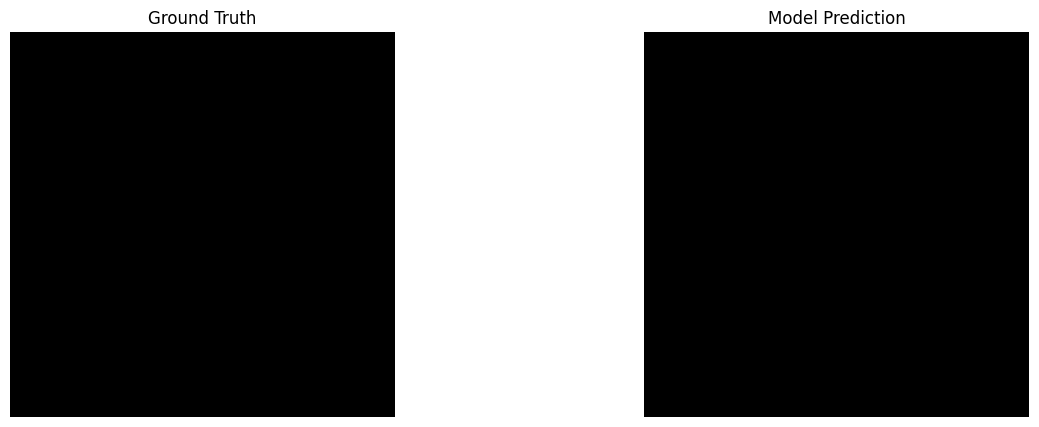

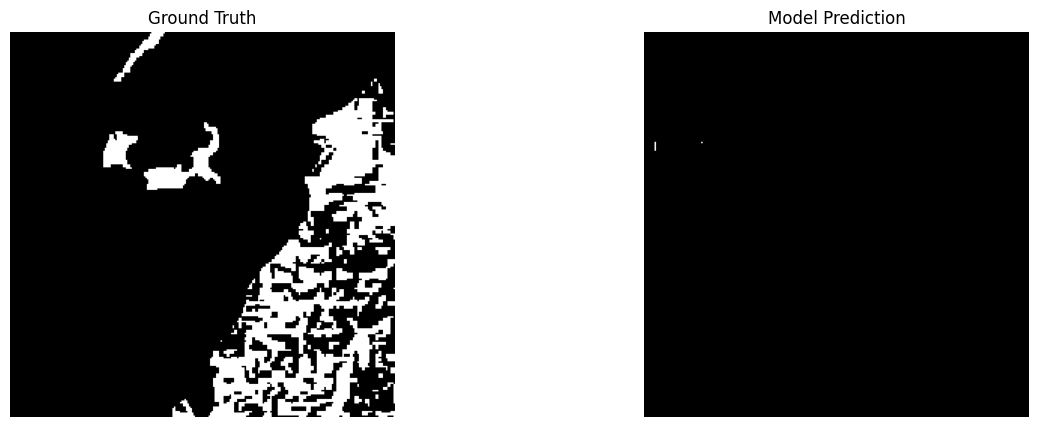

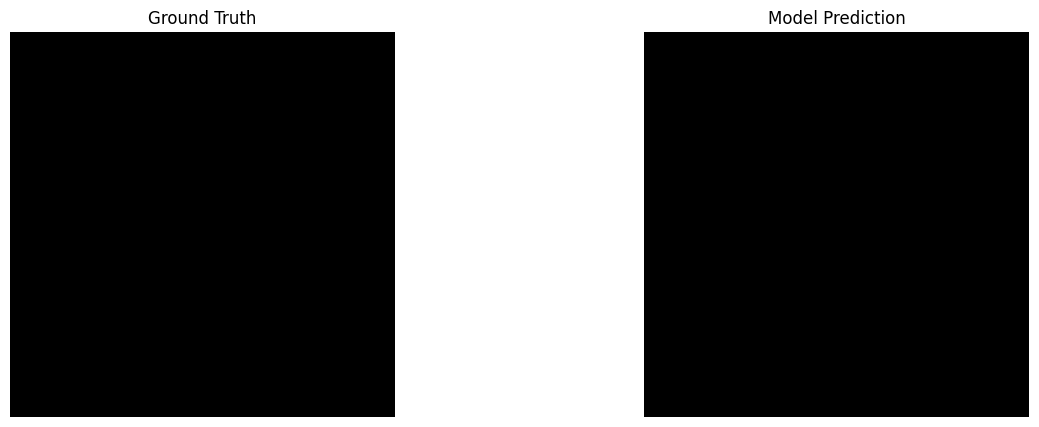

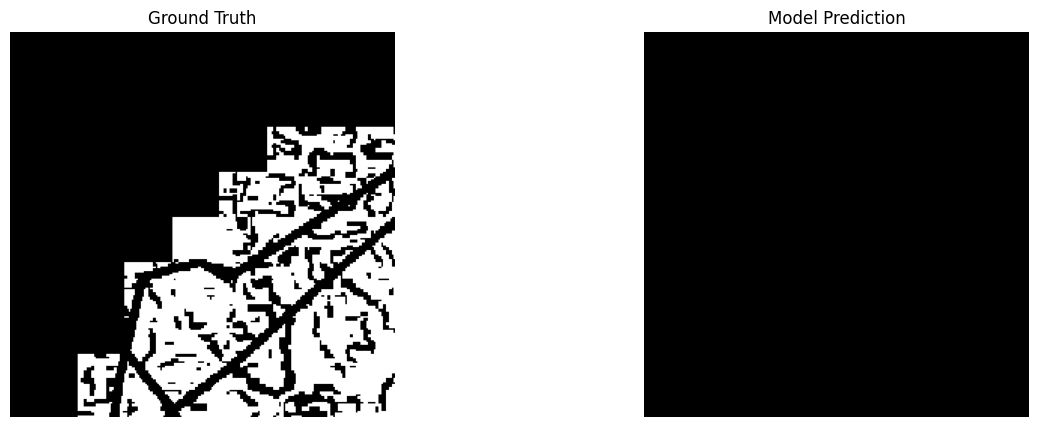

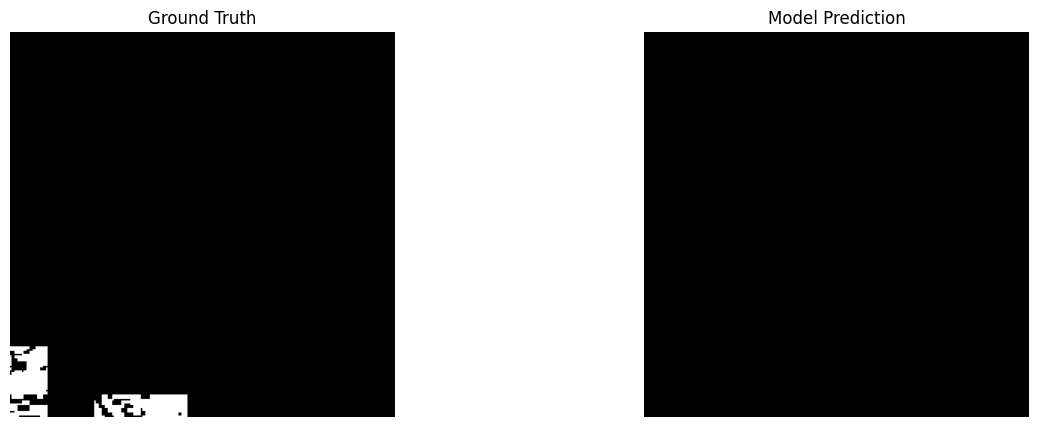

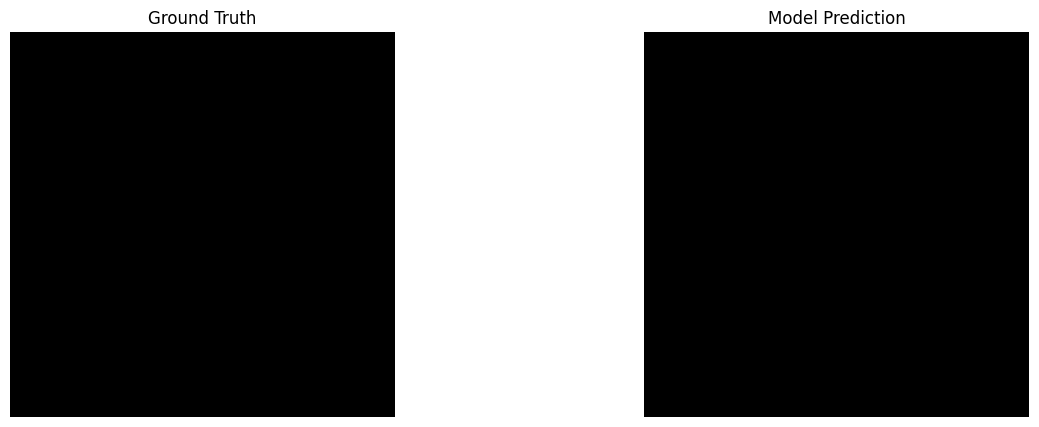

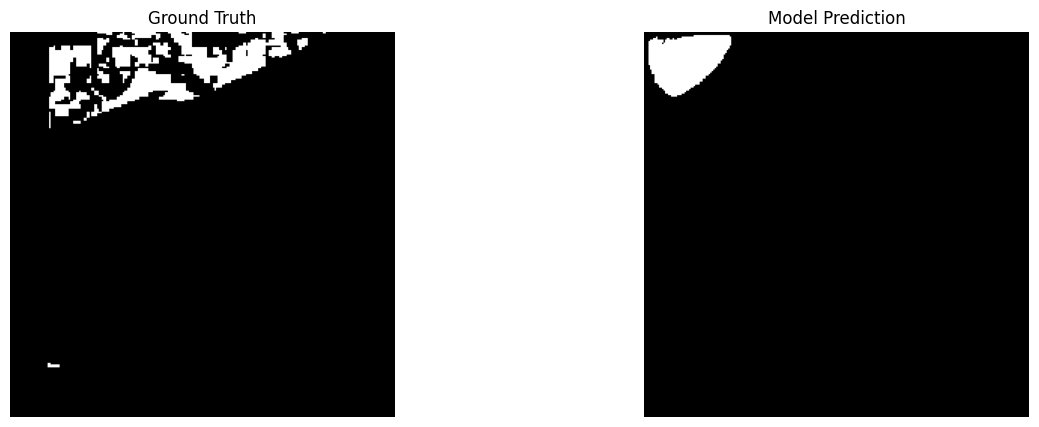

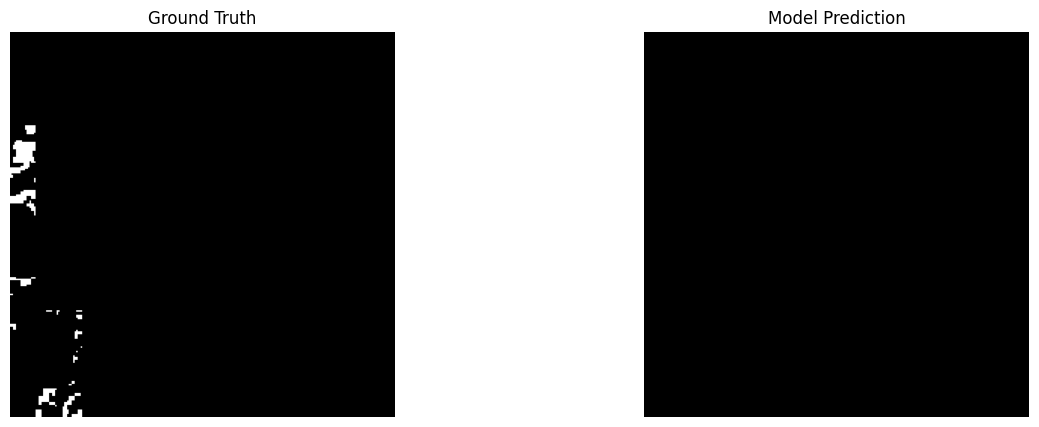

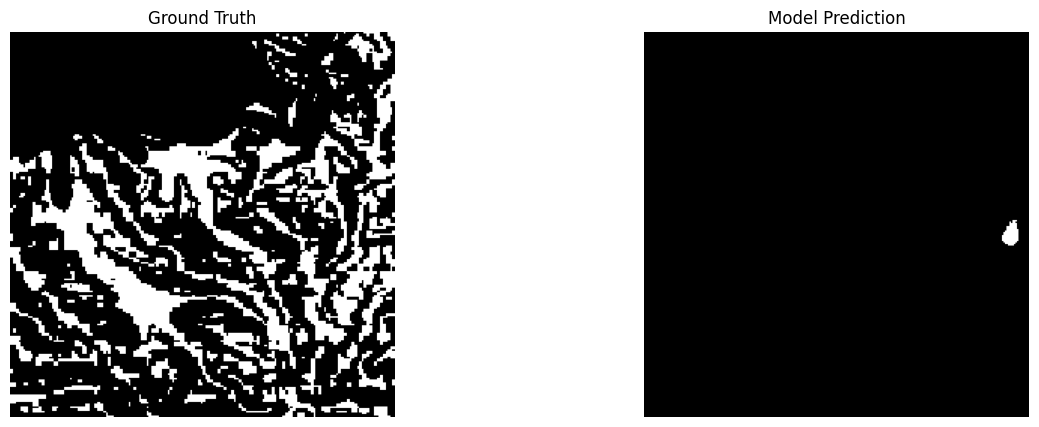

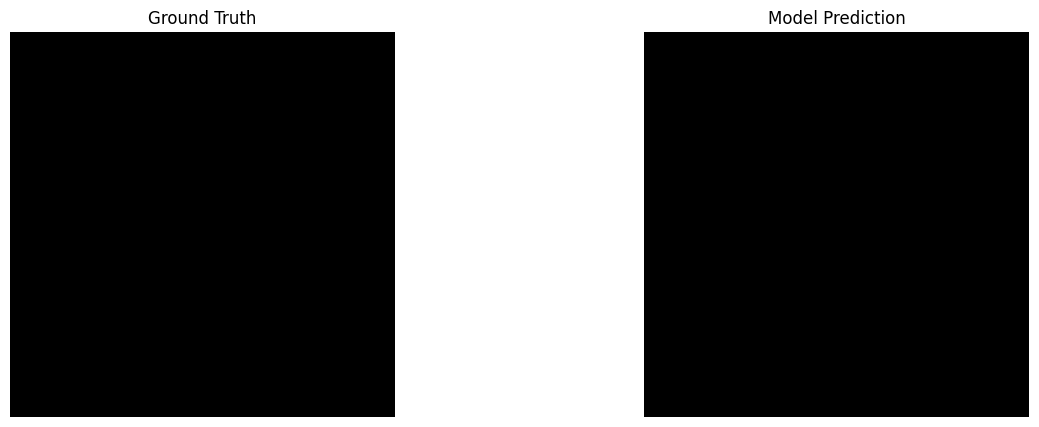

In [ ]:
plot_pred(y_test, threshold_pred, num=20)

In [ ]:
def plot_single_pred(x_test, y_test, predictions, threshold_pred, index):
  plt.figure(figsize=(15,8))

  plt.subplot(4,3,1)
  plt.imshow(x_test[index, :, :, 0], cmap='gray')
  plt.title('Electricity Demand')
  plt.axis('off')

  plt.subplot(4,3,2)
  plt.imshow(x_test[index, :, :, 1], cmap='gray')
  plt.title('Interest spot')
  plt.axis('off')

  plt.subplot(4,3,3)
  plt.imshow(x_test[index, :, :, 2], cmap='gray')
  plt.title('Land Price')
  plt.axis('off')

  plt.subplot(4,3,4)
  plt.imshow(x_test[index, :, :, 3], cmap='gray')
  plt.title('Natural Environment')
  plt.axis('off')

  plt.subplot(4,3,5)
  plt.imshow(x_test[index, :, :, 4], cmap='gray')
  plt.title('Roads')
  plt.axis('off')

  plt.subplot(4,3,6)
  plt.imshow(x_test[index, :, :, 5], cmap='gray')
  plt.title('Elevation')
  plt.axis('off')

  plt.subplot(4,3,7)
  plt.imshow(x_test[index, :, :, 6], cmap='gray')
  plt.title('Transmission Line')
  plt.axis('off')

  plt.subplot(4,3,8)
  plt.imshow(x_test[index, :, :, 7], cmap='gray')
  plt.title('Urban Area')
  plt.axis('off')

  plt.subplot(4,3,9)
  plt.imshow(x_test[index, :, :, 8], cmap='gray')
  plt.title('Wind Speed')
  plt.axis('off')

  plt.subplot(4,3,10)
  plt.imshow(y_test[index, :, :], cmap='gray')
  plt.title('Ground Truth')
  plt.axis('off')

  plt.subplot(4,3,11)
  plt.imshow(predictions[index, :, :, 0], cmap='gray')
  plt.title('Model Prediction (raw prob)')
  plt.axis('off')

  plt.subplot(4,3,12)
  plt.imshow(threshold_pred[index, :, :, 0], cmap='gray')
  plt.title('Model Prediction (binary mask)')
  plt.axis('off')

  plt.show()



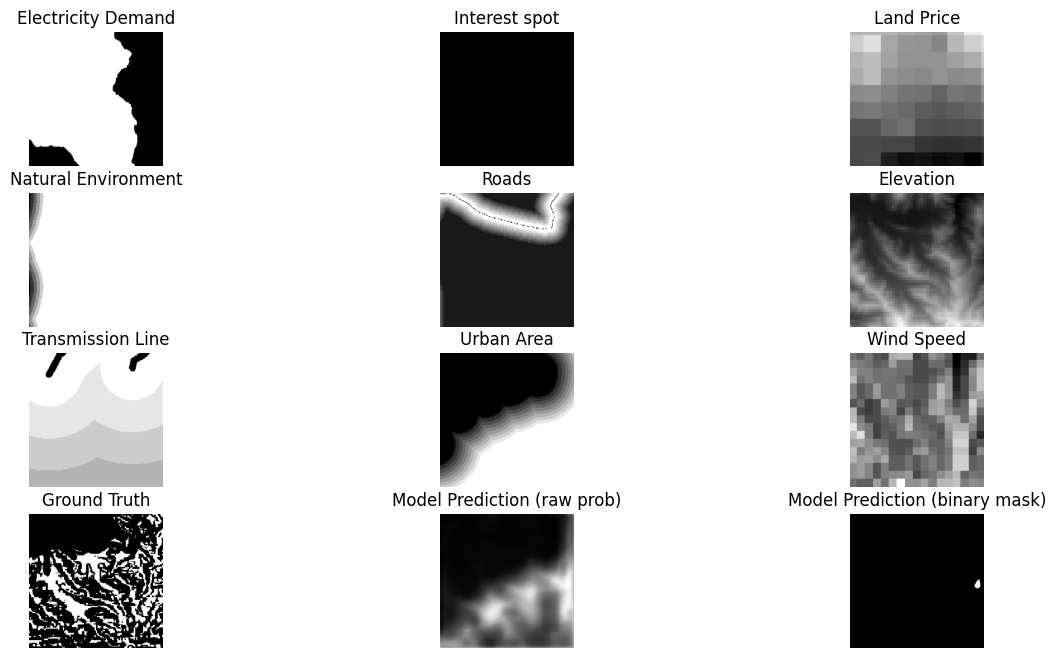

In [ ]:
plot_single_pred(x_test, y_test, predictions, threshold_pred, 18)

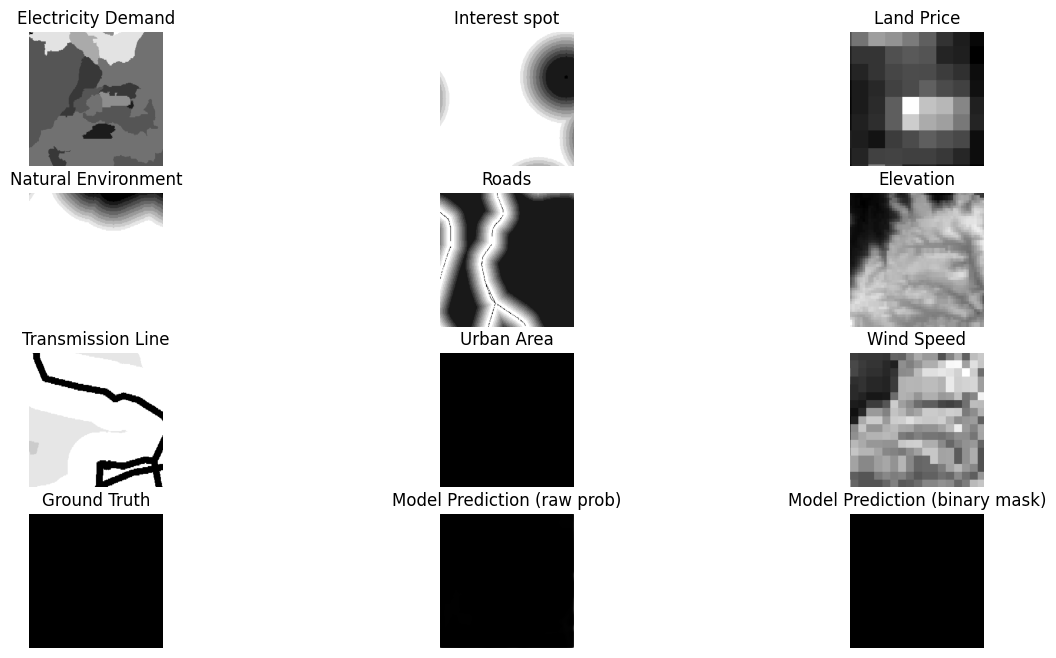

In [ ]:
plot_single_pred(x_test, y_test, predictions, threshold_pred, 1)